In [36]:
import pandas as pd
import numpy as np
import time
from datetime import date, datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns


# GLOBAL VARIABLES

In [37]:
SAVE_CALCULATED_DF_PATH_BASE_FILENAME = 'sundaeswap_calculated.csv'
CALCULATED_FOLDER_PATH = 'D:\ICARO\Proyectos\SeleniumSundaeSwap\Calculated'
SAVE_PLOT_FOLDER_PATH = 'D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots'
SAVE_PLOT = False

FILTER_PAIR = 'MIN/ADA'
FILTER_PAIR_LP_FEE = 0.3
FILTER_PAIR_ID = FILTER_PAIR + '_'+ str(FILTER_PAIR_LP_FEE)
# FILTER_DATE = datetime.fromisoformat('2022-02-13')
FILTER_DATE = datetime.fromisoformat('2022-02-13 12:00:00')

FILTER_PAIR2 = 'SUNDAE/ADA'
FILTER_PAIR2_LP_FEE = 0.3
FILTER_PAIR2_ID = FILTER_PAIR2 + '_'+ str(FILTER_PAIR2_LP_FEE)



# LOAD CALCULATED DATAFRAME

In [38]:
df = pd.read_csv(CALCULATED_FOLDER_PATH+'\\'+SAVE_CALCULATED_DF_PATH_BASE_FILENAME, parse_dates=True)
df.head(3)


,Pair,LpFee,PairPrice,TotalAssetLocked,TotalAdaLocked,AdaVolume24hs,DateTime,Date,Time,MinuteOfDay,DateTimeUnix,_PAIR_ID,_DELTA_PAIRPRICE,_DELTA_TOTALASSETLOCKED,_DELTA_TOTALADALOCKED,_DELTA_DATETIME_SECONDS,_DELTA_DATETIME_MINUTES
0,SUNDAE/ADA,0.3,0.658510,21352876.90,14061097.46,1520497.36,2022-02-13 00:13:32.766419,2022-02-13,00:13:32,13,1644722012,SUNDAE/ADA_0.3,NaN,NaN,NaN,NaN,NaN
1,LQ/ADA,0.3,85.410120,144162.15,12312906.74,635064.55,2022-02-13 00:13:32.766419,2022-02-13,00:13:32,13,1644722012,LQ/ADA_0.3,NaN,NaN,NaN,NaN,NaN
2,WMT/ADA,0.3,0.785214,11970638.00,9399518.76,919539.05,2022-02-13 00:13:32.766419,2022-02-13,00:13:32,13,1644722012,WMT/ADA_0.3,NaN,NaN,NaN,NaN,NaN


In [39]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17780 entries, 0 to 17779
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pair                     17780 non-null  object        
 1   LpFee                    17780 non-null  float64       
 2   PairPrice                17780 non-null  float64       
 3   TotalAssetLocked         17780 non-null  float64       
 4   TotalAdaLocked           17780 non-null  float64       
 5   AdaVolume24hs            17780 non-null  float64       
 6   DateTime                 17780 non-null  datetime64[ns]
 7   Date                     17780 non-null  object        
 8   Time                     17780 non-null  object        
 9   MinuteOfDay              17780 non-null  int64         
 10  DateTimeUnix             17780 non-null  int64         
 11  _PAIR_ID                 17780 non-null  object        
 12  _DELTA_PAIRPRICE         17724 n

# GRAPHS

## FUNCTIONS

In [40]:
def graphAssetPrice(dfgraph: pd.DataFrame, title):
    plt.figure(figsize=(22,8))
    sns.scatterplot(data= dfgraph, x = 'DateTime', y = 'PairPrice', hue = 'TotalAdaLocked')
    # sns.scatterplot(data= dfgraph, x = 'DateTime', y = 'PairPrice', hue = 'TotalAdaLocked', size = 'TotalAdaLocked')
    plt.xlabel('Date and Time')
    plt.ylabel('Price in ADA')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

In [41]:
def graphAssetPrice2(X, Y):
    plt.figure(figsize=(16,8))
    # sns.histplot(x = X, y = Y)
    # sns.scatterplot(x = X, y = Y)
    sns.lineplot(x = X, y = Y)
    plt.xticks(rotation=45)
    plt.show()

In [52]:
def graphAssetPrice3(dfgraph: pd.DataFrame, title: str, savePlot: bool, pairId: str, addScatter: bool = True):
    # The idea would be to create three subplots at the same position. 
    # In order to make sure, they will be recognized as different plots, their properties need to differ 
    # - and the easiest way to achieve this is simply to provide a different label, ax=fig.add_subplot(111, label="1").
    fig=plt.figure(figsize=(22,8))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    if addScatter:
        ax3=fig.add_subplot(111, label="3", frame_on=False)

    ax.plot(dfgraph['DateTime'], dfgraph['PairPrice'], color="C0")
    #ax.set_facecolor('silver')
    ax.set_xlabel("Date and Time", color="C0")
    ax.set_ylabel("Price in ADA", color="C0")
    ax.set_xticks(dfgraph['DateTime'].iloc[::8]) #cada 8 intervalos
    ax.set_xticklabels(dfgraph['DateTime'].iloc[::8].dt.strftime("%y-%m-%d %H:%M"), rotation=45) # formato dia horas
    ax.tick_params(axis='x', colors="C0", rotation=45)
    ax.tick_params(axis='y', colors="C0")
    ax.grid()
    
    if addScatter:
        ax3.scatter(dfgraph['DateTime'], dfgraph['PairPrice'], color="C0")
        ax3.set_xticks([])
        ax3.set_yticks([])

    ax2.plot(dfgraph['DateTime'], dfgraph['TotalAdaLocked'], color="C1")
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('Date and Time', color="C1") 
    ax2.set_ylabel('Total Ada Locked', color="C1")       
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', colors="C1", rotation=45)
    ax2.tick_params(axis='y', colors="C1")

    ax2.xaxis.set_visible(False)
    
    #plt.style.use("dark_background")
    plt.style.use("default")
    plt.title(title)
    
    if savePlot:
        filename = SAVE_PLOT_FOLDER_PATH+'\\'+pairId.replace('/','-')+'.png'
        plt.savefig(filename)
        print('Plot saved:', filename)
        
    plt.show()

In [43]:
def graphCompareAssetsPrice(dfAsset1: pd.DataFrame, dfAsset2: pd.DataFrame, name1, name2, title):
    # The idea would be to create three subplots at the same position. 
    # In order to make sure, they will be recognized as different plots, their properties need to differ 
    # - and the easiest way to achieve this is simply to provide a different label, ax=fig.add_subplot(111, label="1").
    fig=plt.figure(figsize=(22,8))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax3=fig.add_subplot(111, label="3", frame_on=False)
    ax4=fig.add_subplot(111, label="4", frame_on=False)
    
    ax.plot(dfAsset1['DateTime'], dfAsset1['PairPrice'], color="C0")
    #ax.set_facecolor('silver')
    ax.set_xlabel("Date and Time", color="C0")
    ax.set_ylabel(f"Price in ADA {name1}", color="C0")
    ax.set_xticks(dfAsset1['DateTime'].iloc[::8]) #cada 8 intervalos
    ax.set_xticklabels(dfAsset1['DateTime'].iloc[::8].dt.strftime("%y-%m-%d %H:%M"), rotation=45) # formato dia horas
    ax.tick_params(axis='x', colors="C0", rotation=45)
    ax.tick_params(axis='y', colors="C0")
    ax.grid()
    
    ax3.scatter(dfAsset1['DateTime'], dfAsset1['PairPrice'], color="C0")
    ax3.set_xticks([])
    ax3.set_yticks([])

    ax2.plot(dfAsset2['DateTime'], dfAsset2['PairPrice'], color="C1")
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('Date and Time', color="C1") 
    ax2.set_ylabel(f"Price in ADA {name2}", color="C1")       
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', colors="C1", rotation=45)
    ax2.tick_params(axis='y', colors="C1")
    
    ax2.xaxis.set_visible(False)
    
    ax4.scatter(dfAsset2['DateTime'], dfAsset2['PairPrice'], color="C1")
    ax4.set_xticks([])
    ax4.set_yticks([])

   
    
    #plt.style.use("dark_background")
    plt.style.use("default")
    plt.title(title)

    plt.show()

## PLOTS

In [44]:
filterAsset1 = (df['DateTime'] > FILTER_DATE) & (df['_PAIR_ID'] == FILTER_PAIR_ID)
asset1Name = f'{FILTER_PAIR} ({FILTER_PAIR_LP_FEE} LP fee)'
filterAsset2 = (df['DateTime'] > FILTER_DATE) & (df['_PAIR_ID'] == FILTER_PAIR2_ID)
asset2Name = f'{FILTER_PAIR2} ({FILTER_PAIR2_LP_FEE} LP fee)'

df[filterAsset1].head(10)

,Pair,LpFee,PairPrice,TotalAssetLocked,TotalAdaLocked,AdaVolume24hs,DateTime,Date,Time,MinuteOfDay,DateTimeUnix,_PAIR_ID,_DELTA_PAIRPRICE,_DELTA_TOTALASSETLOCKED,_DELTA_TOTALADALOCKED,_DELTA_DATETIME_SECONDS,_DELTA_DATETIME_MINUTES
720,MIN/ADA,0.3,0.288973,188485.79,54467.31,77693.64,2022-02-13 18:30:40.963175,2022-02-13,18:30:40,1110,1644787840,MIN/ADA_0.3,0.017885,-3402.46,2448.58,50400.0,840.000000
770,MIN/ADA,0.3,0.282916,190498.49,53895.24,78841.92,2022-02-13 18:45:46.736248,2022-02-13,18:45:46,1125,1644788746,MIN/ADA_0.3,-0.006057,2012.70,-572.07,905.0,15.083333
820,MIN/ADA,0.3,0.277234,192447.13,53352.90,81128.39,2022-02-13 19:00:44.022930,2022-02-13,19:00:44,1140,1644789644,MIN/ADA_0.3,-0.005682,1948.64,-542.34,897.0,14.950000
870,MIN/ADA,0.3,0.277234,192447.13,53352.90,80786.64,2022-02-13 19:15:46.387042,2022-02-13,19:15:46,1155,1644790546,MIN/ADA_0.3,0.000000,0.00,0.00,902.0,15.033333
920,MIN/ADA,0.3,0.277234,192447.13,53352.90,80786.64,2022-02-13 19:30:45.253658,2022-02-13,19:30:45,1170,1644791445,MIN/ADA_0.3,0.000000,0.00,0.00,898.0,14.966667
969,MIN/ADA,0.3,0.315482,180422.27,56920.11,84530.38,2022-02-13 19:45:47.170391,2022-02-13,19:45:47,1185,1644792347,MIN/ADA_0.3,0.038248,-12024.86,3567.21,901.0,15.016667
1019,MIN/ADA,0.3,0.352694,170666.95,60193.32,96287.17,2022-02-13 20:00:47.478679,2022-02-13,20:00:47,1200,1644793247,MIN/ADA_0.3,0.037212,-9755.32,3273.21,900.0,15.000000
1069,MIN/ADA,0.3,0.331836,190133.52,63093.26,91487.65,2022-02-13 20:15:45.094707,2022-02-13,20:15:45,1215,1644794145,MIN/ADA_0.3,-0.020858,19466.57,2899.94,897.0,14.950000
1119,MIN/ADA,0.3,0.331836,190383.52,63176.22,91487.65,2022-02-13 20:30:44.412752,2022-02-13,20:30:44,1230,1644795044,MIN/ADA_0.3,0.000000,250.00,82.96,899.0,14.983333
1169,MIN/ADA,0.3,0.327016,191783.52,62716.42,91947.46,2022-02-13 20:45:45.962447,2022-02-13,20:45:45,1245,1644795945,MIN/ADA_0.3,-0.004820,1400.00,-459.80,901.0,15.016667


In [45]:
# title = f'Pair {FILTER_PAIR} ({FILTER_PAIR_LP_FEE} LP fee) price & Total Ada Locked in LP'
# filterAsset = (df['Pair'] == FILTER_PAIR) & (df['LpFee'] == FILTER_PAIR_LP_FEE)
# filterAsset = df['_PAIR_ID'] == FILTER_PAIR_ID

title = f'Pair {asset1Name} price & Total Ada Locked in LP since {FILTER_DATE}'
# filterAsset = (df['DateTime'] > FILTER_DATE) & (df['_PAIR_ID'] == FILTER_PAIR_ID)
df[filterAsset1].head(3)

,Pair,LpFee,PairPrice,TotalAssetLocked,TotalAdaLocked,AdaVolume24hs,DateTime,Date,Time,MinuteOfDay,DateTimeUnix,_PAIR_ID,_DELTA_PAIRPRICE,_DELTA_TOTALASSETLOCKED,_DELTA_TOTALADALOCKED,_DELTA_DATETIME_SECONDS,_DELTA_DATETIME_MINUTES
720,MIN/ADA,0.3,0.288973,188485.79,54467.31,77693.64,2022-02-13 18:30:40.963175,2022-02-13,18:30:40,1110,1644787840,MIN/ADA_0.3,0.017885,-3402.46,2448.58,50400.0,840.000000
770,MIN/ADA,0.3,0.282916,190498.49,53895.24,78841.92,2022-02-13 18:45:46.736248,2022-02-13,18:45:46,1125,1644788746,MIN/ADA_0.3,-0.006057,2012.70,-572.07,905.0,15.083333
820,MIN/ADA,0.3,0.277234,192447.13,53352.90,81128.39,2022-02-13 19:00:44.022930,2022-02-13,19:00:44,1140,1644789644,MIN/ADA_0.3,-0.005682,1948.64,-542.34,897.0,14.950000


In [46]:
# graphAssetPrice(df[filterAsset1], title)

In [47]:
# graphAssetPrice2(df[df['Pair']=='PAVIA/ADA'].DateTime, df[df['Pair']=='PAVIA/ADA'].PairPrice)

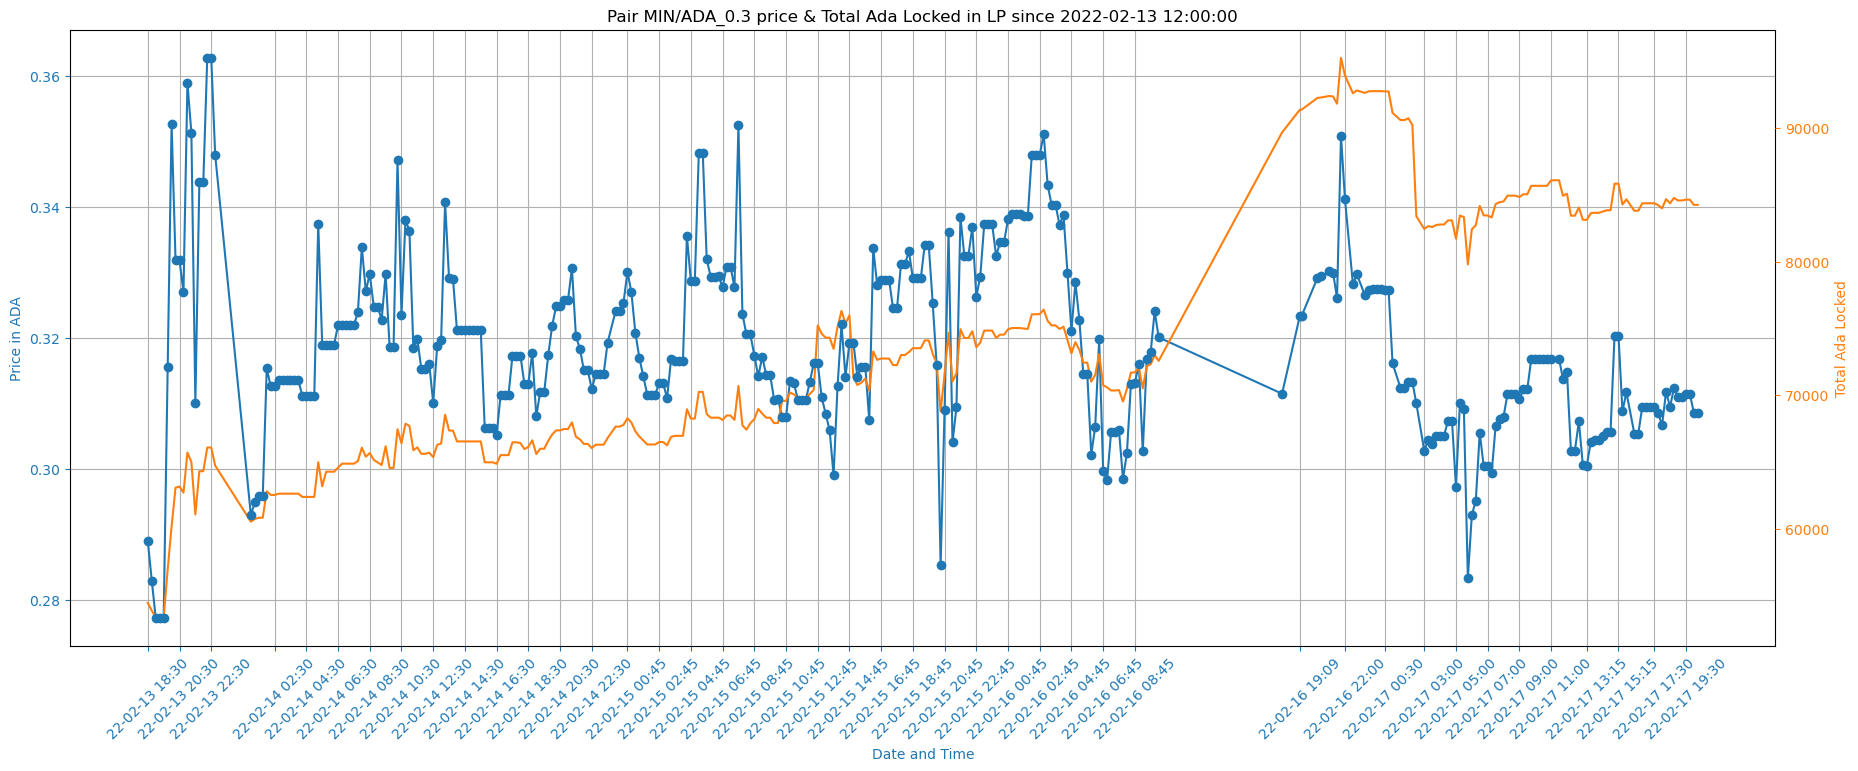

In [55]:
graphAssetPrice3(df[filterAsset1], title, SAVE_PLOT, FILTER_PAIR_ID, True)

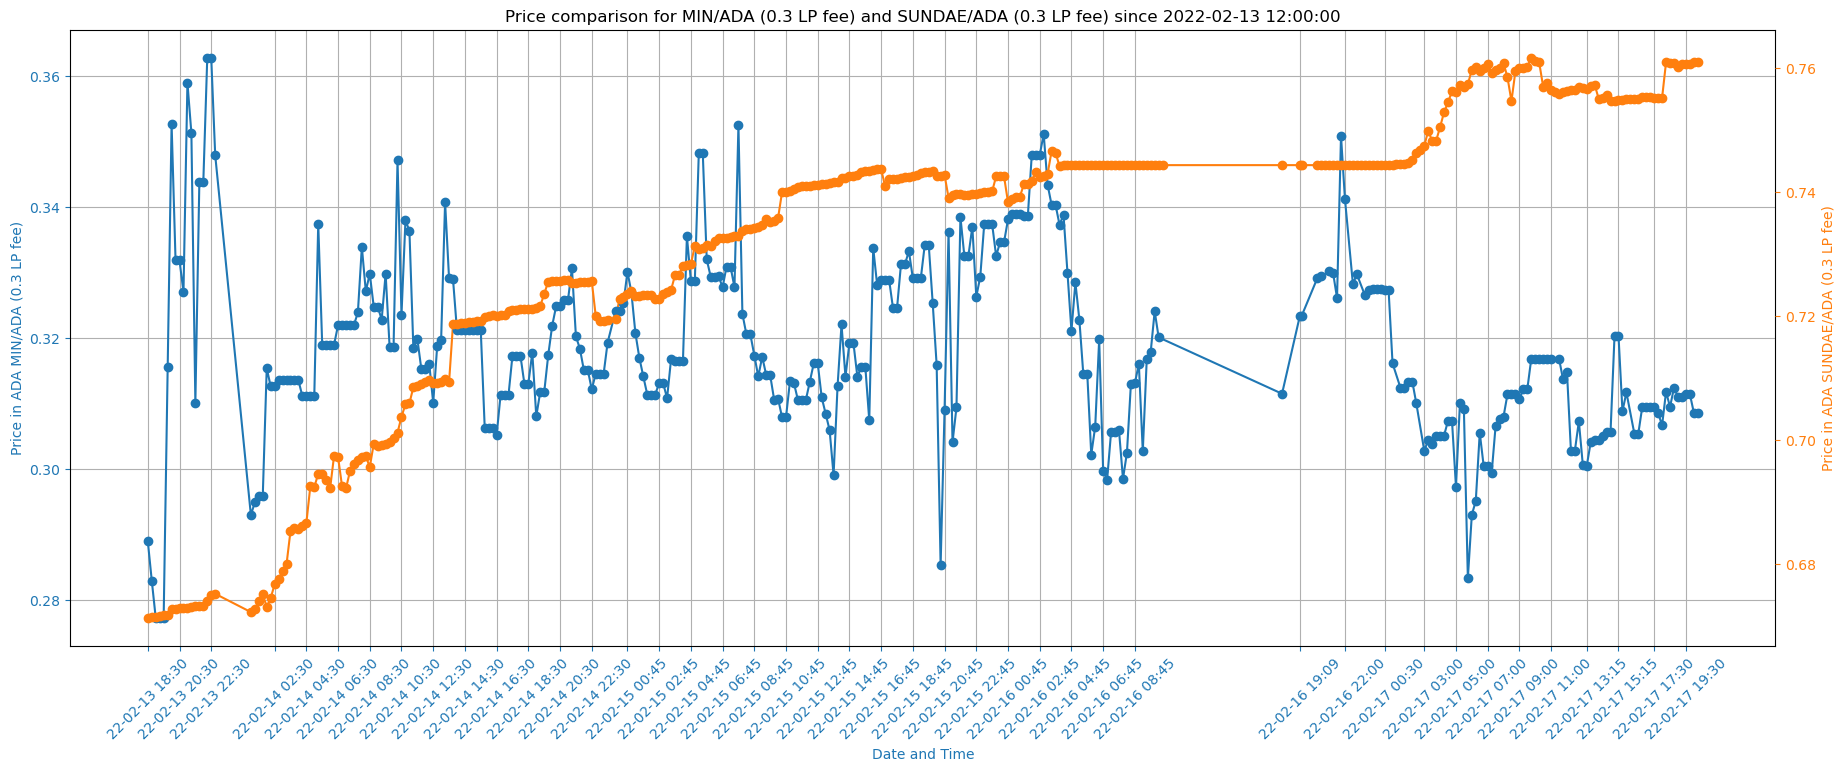

In [49]:
asset1 = df[filterAsset1]
asset2 = df[filterAsset2]
title = f'Price comparison for {asset1Name} and {asset2Name} since {FILTER_DATE}'
graphCompareAssetsPrice(asset1,asset2,asset1Name,asset2Name, title)

In [50]:
df['_PAIR_ID'].unique()[0]

'SUNDAE/ADA_0.3'

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\SUNDAE-ADA_0.3.png


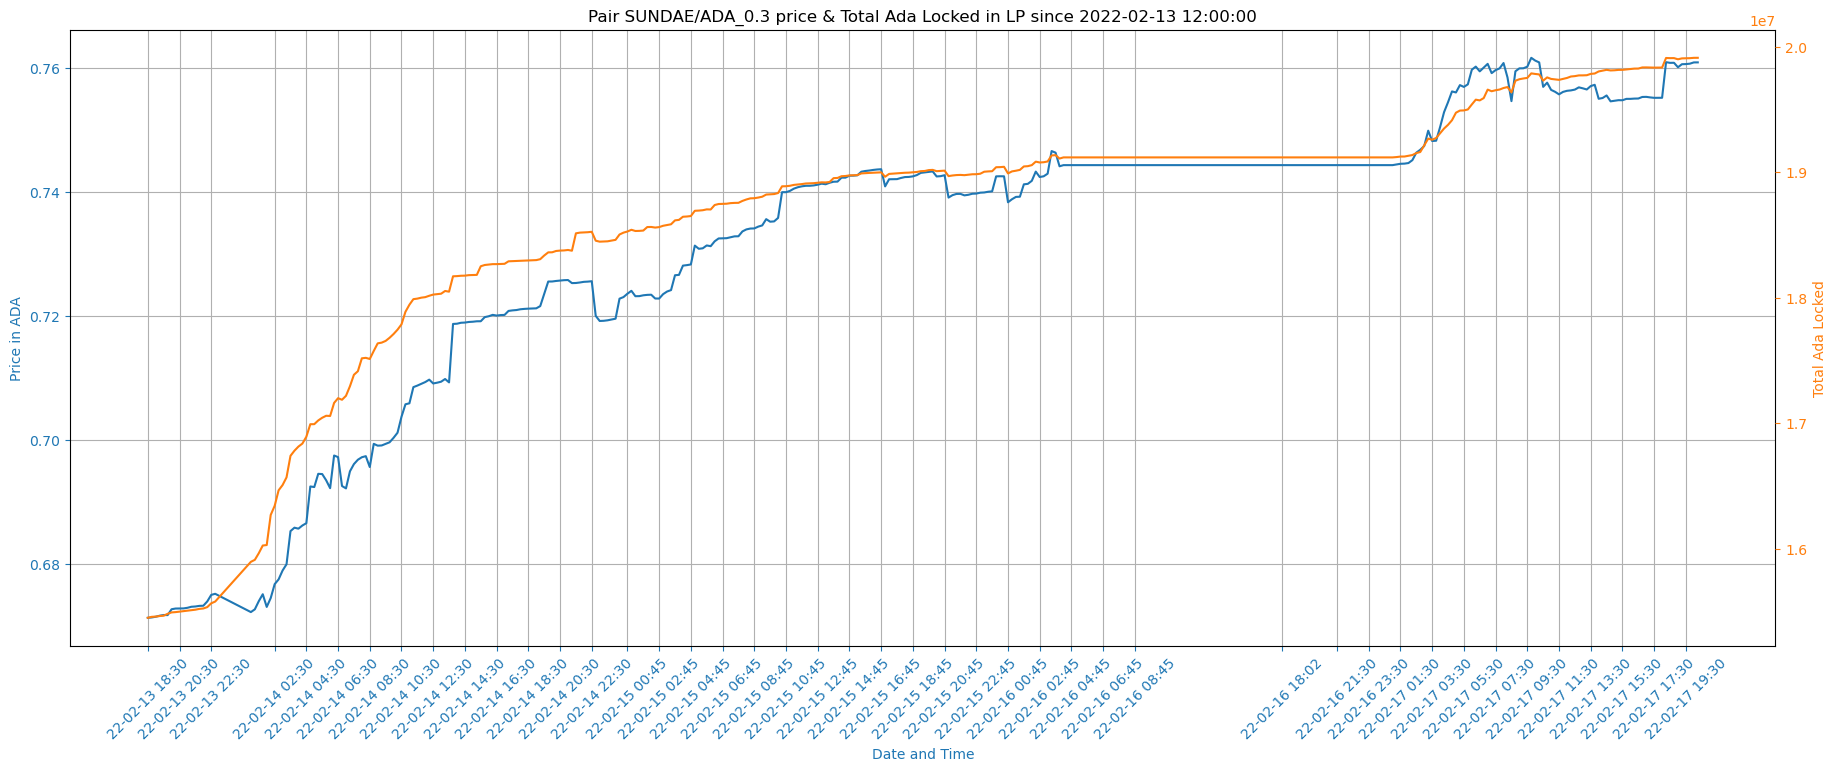

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\LQ-ADA_0.3.png


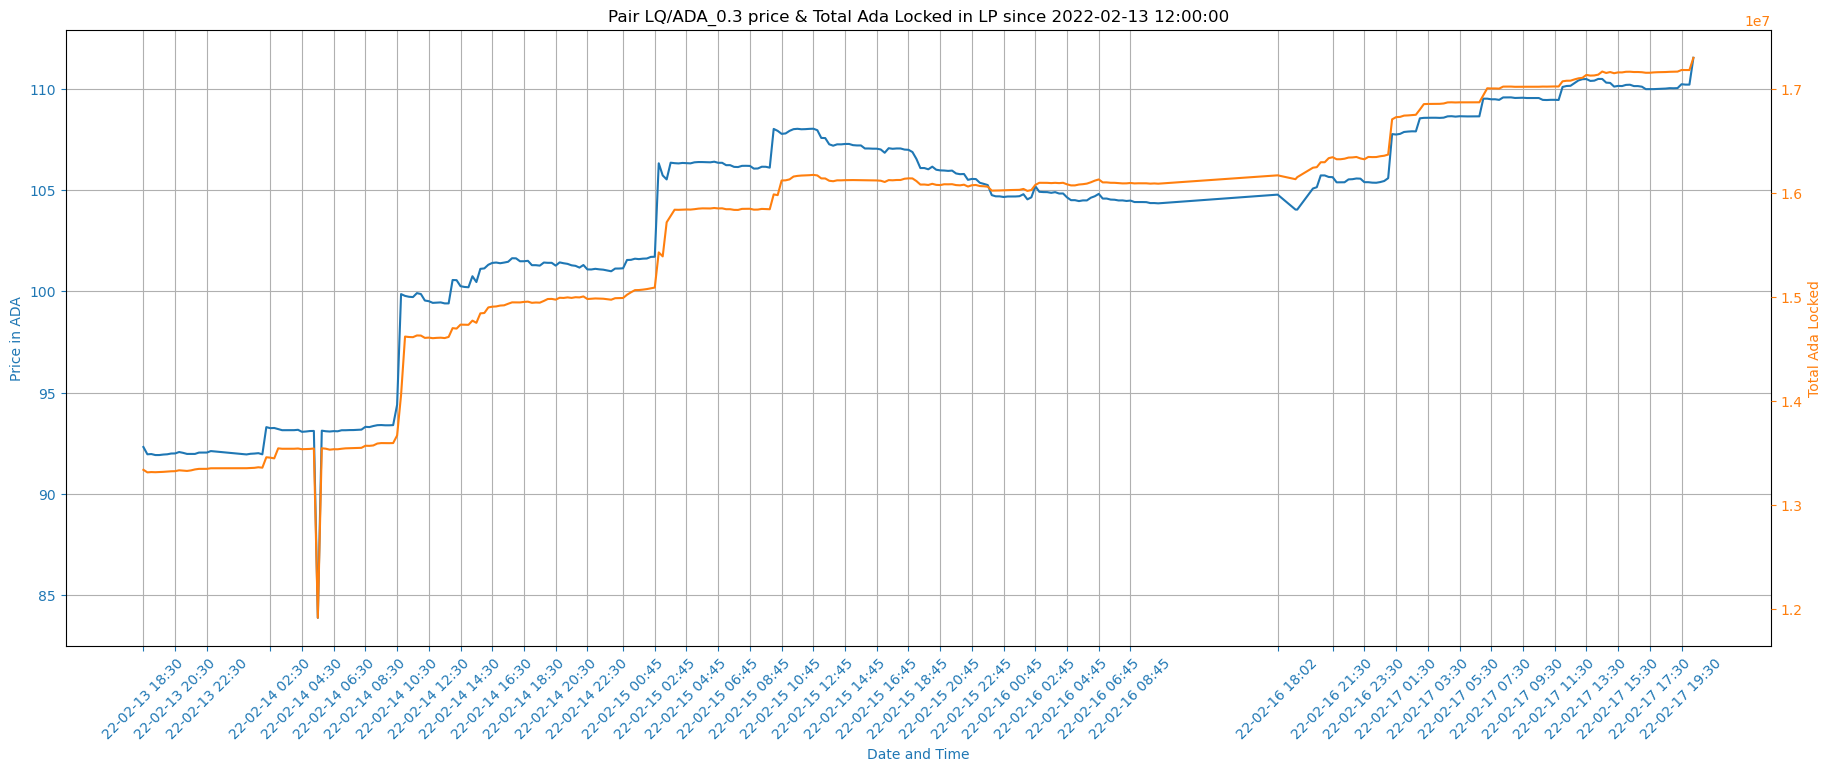

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\WMT-ADA_0.3.png


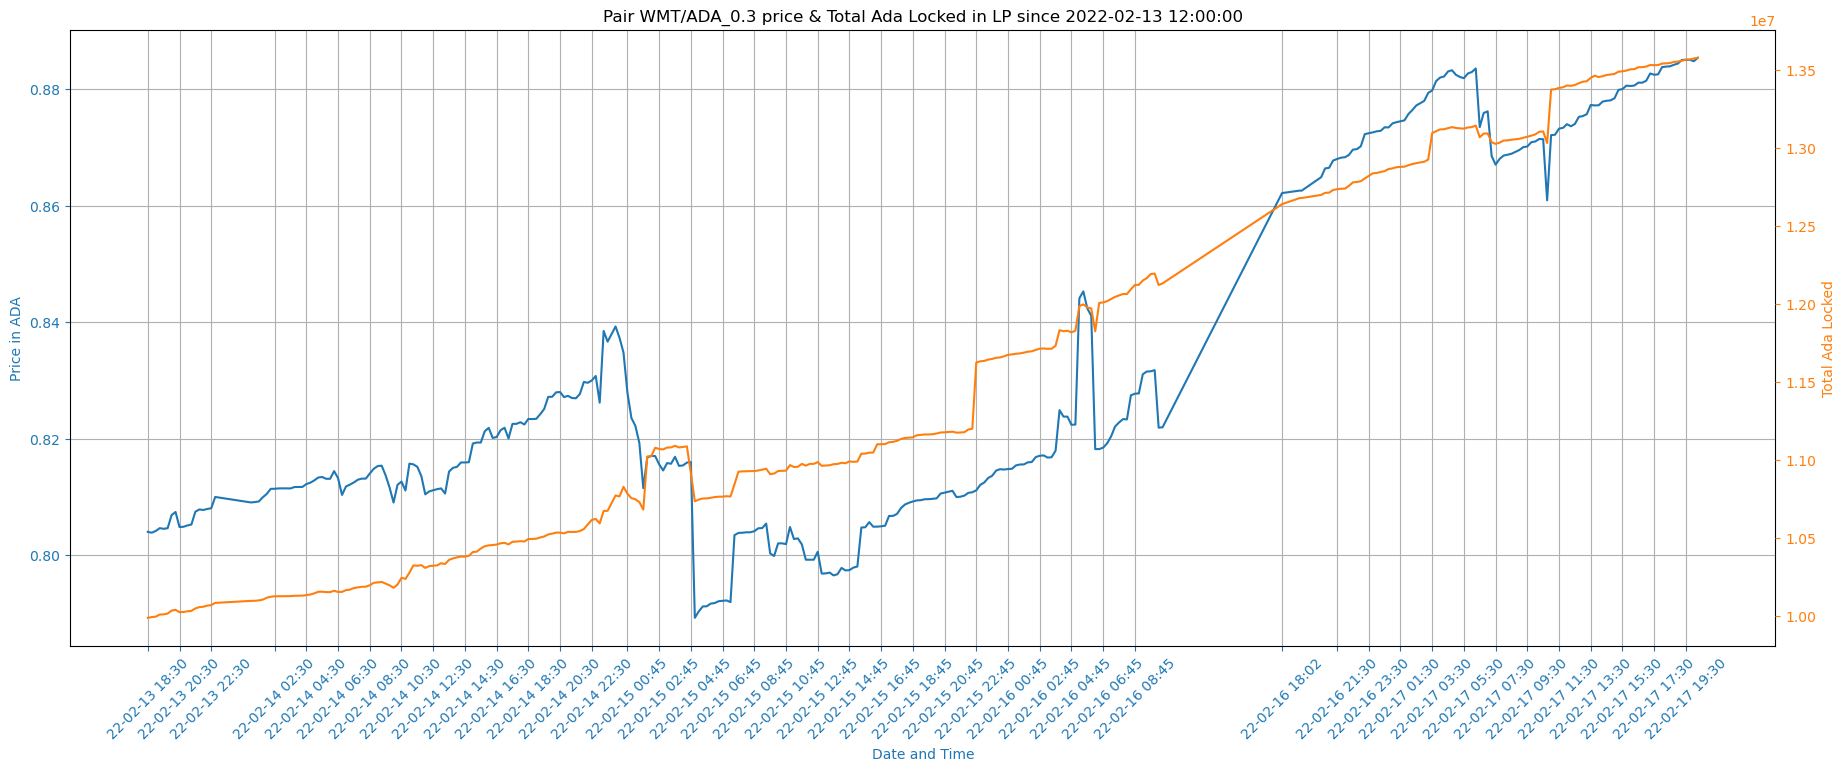

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\MELD-ADA_0.3.png


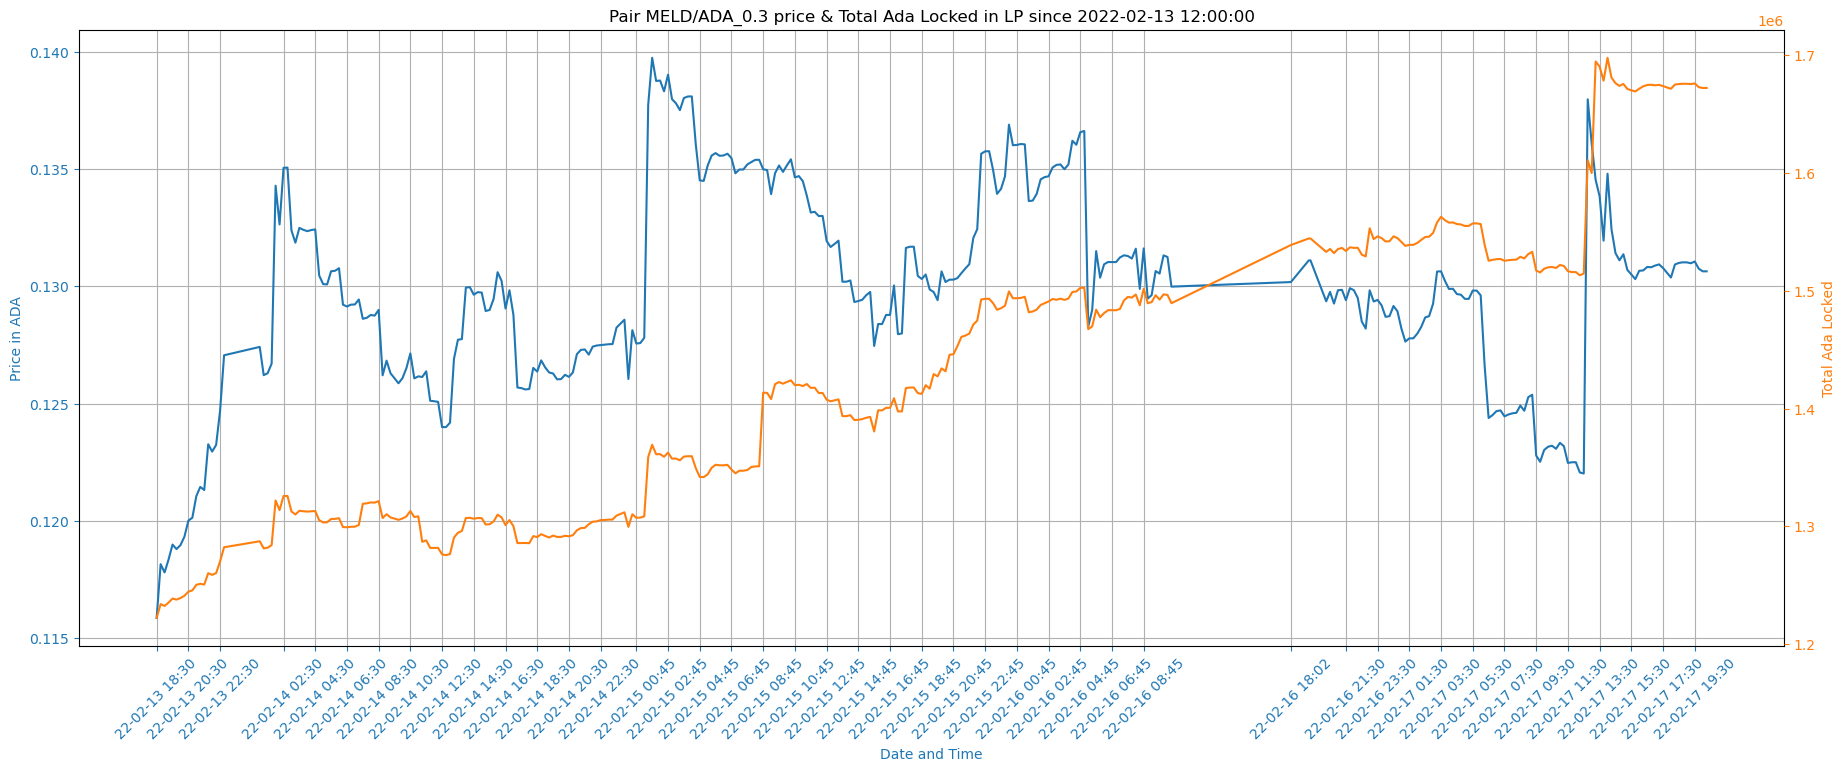

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\MILK-ADA_0.3.png


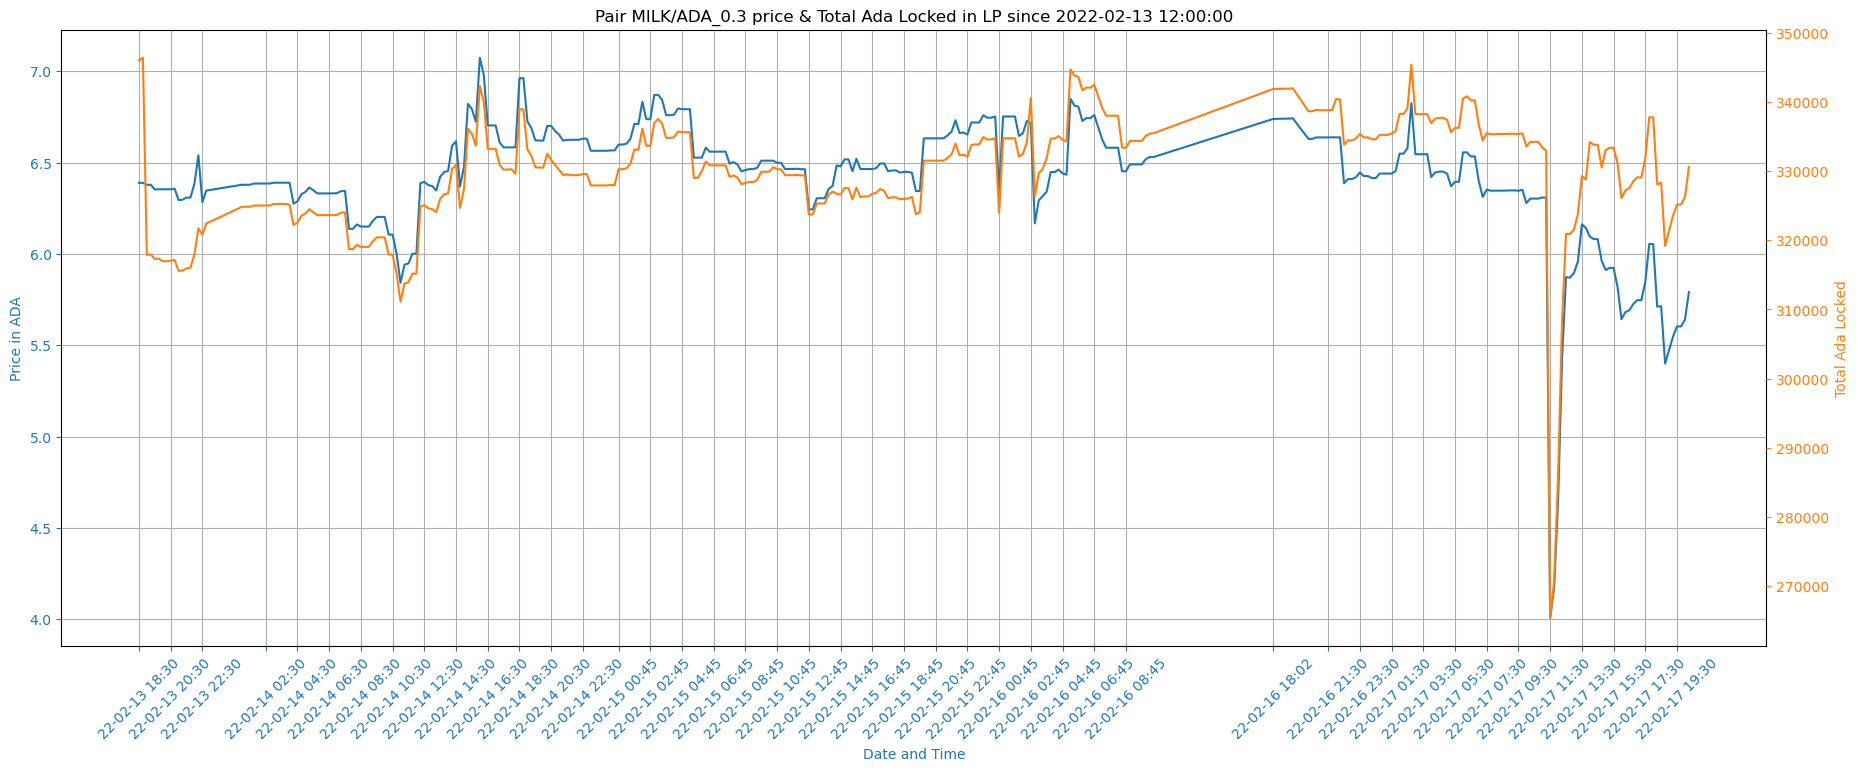

Plot saved: D:\ICARO\Proyectos\SeleniumSundaeSwap\Plots\MIN-ADA_0.3.png


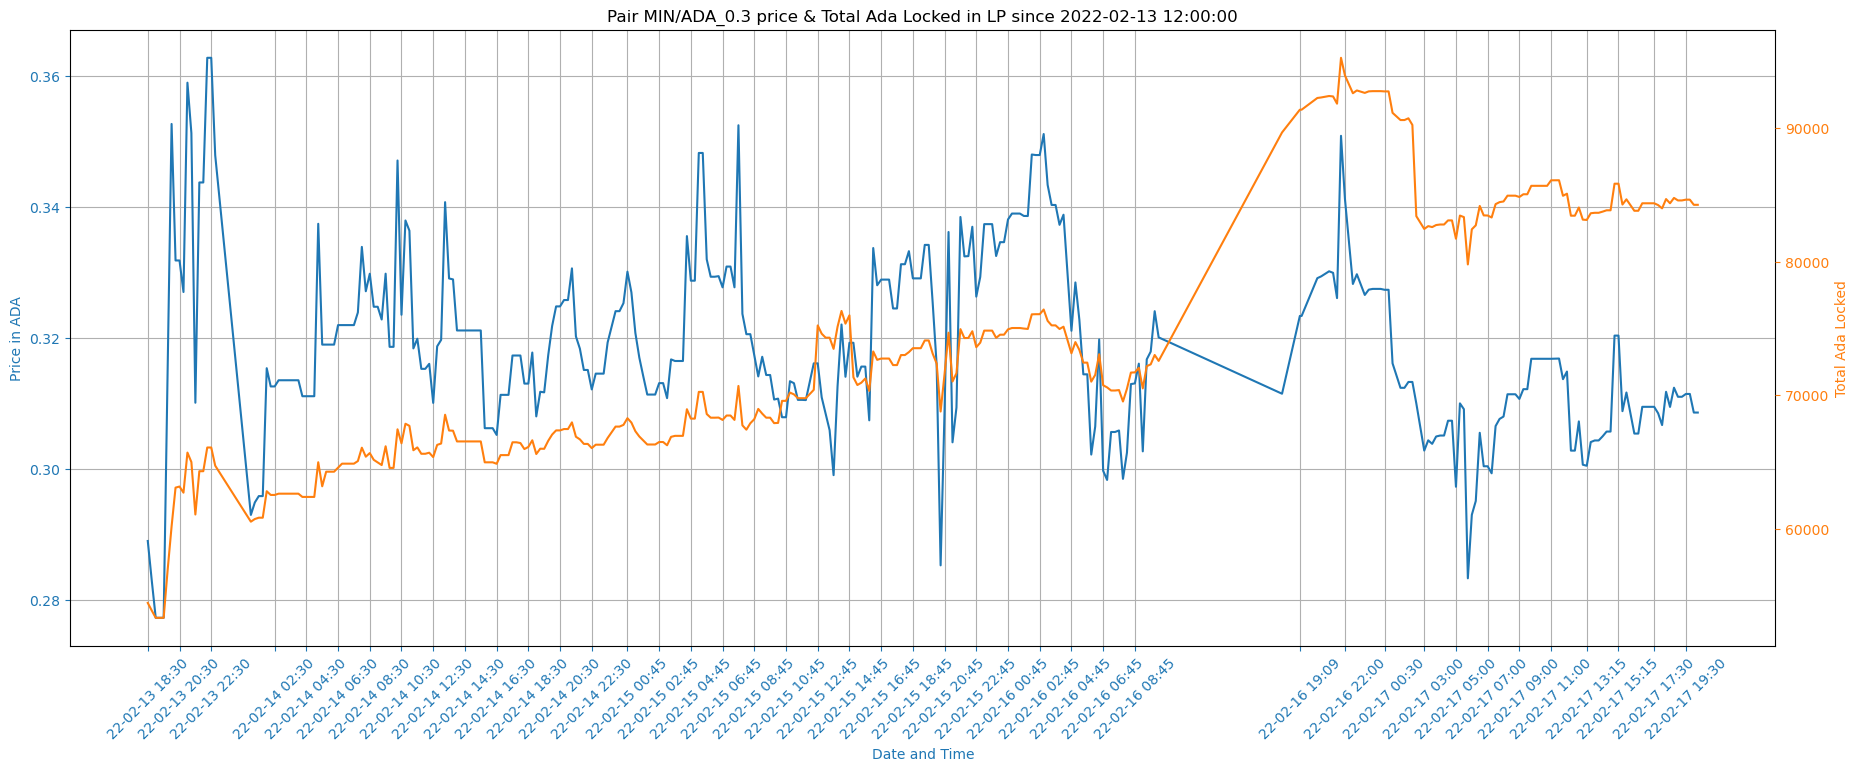

In [56]:
pairIdList = ['SUNDAE/ADA_0.3','LQ/ADA_0.3','WMT/ADA_0.3','MELD/ADA_0.3','MILK/ADA_0.3','MIN/ADA_0.3']

for pair in pairIdList:
    title = f'Pair {pair} price & Total Ada Locked in LP since {FILTER_DATE}'
    filter = (df['DateTime'] > FILTER_DATE) & (df['_PAIR_ID'] == pair)
    graphAssetPrice3(df[filter], title, True, pair, False)